In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
df=pd.read_csv('/gdrive/MyDrive/Risk Prediction/Dataset/SMOTEdata.csv',index_col=[0])

In [ ]:
df.tail()

,Derivation cohort,LOS_Y,LOS,Severity,Black,White,Asian,Latino,MI,PVD,...,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1,Death,Severity_class
7121,1,1,4,7,1,0,0,0,0,-0.372374,...,0.190243,0,0,-0.312628,0,0,-0.076655,0,1,2
7122,0,1,19,2,0,0,0,0,0,-0.372374,...,-0.331234,0,1,-0.282900,1,1,-0.134453,0,1,0
7123,1,1,9,7,0,0,0,0,0,-0.372374,...,1.664204,1,1,1.010807,1,0,0.114923,0,1,2
7124,1,1,10,5,0,0,0,0,0,-0.372374,...,-0.661883,0,0,-0.088986,0,1,-0.175698,0,1,1
7125,0,1,21,3,0,0,0,0,0,-0.372374,...,0.064132,1,1,-0.297764,0,1,-0.165987,0,1,1


In [ ]:
req_features=['LOS_Y', 'LOS', 'Severity',
       'All CNS', 'Pure CNS', 'Age.1', 'AgeScore', 'O2 Sat < 94', 'MAP < 70', 'Ddimer', 'D-Dimer > 3', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUN',
       'BUN > 30', 'Creatinine', 'CrtnScore',
       'Sodium < 139 or > 154', 'AST', 'AST > 40', 'WBC', 'WBC <1.8 or > 4.8',
       'Lymphocytes < 1', 'IL6 > 150',
       'Ferritin', 'Ferritin > 300', 'CrctProtein',
       'C-Reactive Prot > 10', 'Procalcitonin',
       'Procalciton > 0.1', 'TropYes', 'Troponin', 'Troponin > 0.1']

In [ ]:
X=df[req_features]

In [ ]:
X.shape

(7126, 35)

In [ ]:
Y=df['Death']

In [ ]:
Y.shape

(7126,)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu', input_shape=(35,1)))
model.add(MaxPooling1D(pool_size=2 ,strides=1))
#model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
#model.add(Conv1D(filters=512, kernel_size=3, strides=1, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2 ,strides=1))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2 ,strides=1))
#model.add(Conv1D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2 ,strides=1))
#model.add(Reshape((64,32,3), input_shape=(24,256)))
#model.add(Reshape((11,340,3), input_shape=(11,4,256)))
#model.add(VGG19(include_top=False,weights="imagenet",input_shape=(64,32,3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 33, 256)           1024      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 256)           196864    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 29, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 256)           196864    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 26, 256)          0

In [ ]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adadelta
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
opt=Adam(learning_rate= 0.0001)  
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='Precision'),
      keras.metrics.Recall(name='Recall'),
      keras.metrics.AUC(name='Auc'),
      
]

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics='accuracy')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix

In [ ]:
kfold = KFold(n_splits=10, shuffle=False)

In [ ]:
j=1           
i=1
for train_index, test_index in kfold.split(df):
    X4 = df.iloc[train_index].loc[:, req_features]
    X5 = df.iloc[test_index][req_features]
    y4= df.iloc[train_index].loc[:,'Death']
    y5 = df.loc[test_index]['Death']

    X6= X4.to_numpy('float64')
    X7=np.resize(X6,(X4.shape[0],35,1))
    X8= X5.to_numpy('float64')
    X9=np.resize(X8,(X5.shape[0],35,1))
    y6=y4.to_numpy('int')    #train output
    y7=y5.to_numpy('int')
    train_x = X7
    train_y = y6
    validation_x = X9
    validation_y = y7
    history= model.fit(train_x , train_y, epochs=10, batch_size=12,verbose=1) #Training the model
    ypre=model.predict(validation_x)
    pre_y=np.round(abs(ypre))
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(validation_y, pre_y )}")
    accuracy = accuracy_score(validation_y, pre_y)
    print('Accuracy: %f' % accuracy)
    matrix = confusion_matrix(validation_y, pre_y)
    print(matrix)
    i+= 1 
    j=j+1 

Epoch 1/10
535/535 [==============================] - 15s 5ms/step - loss: 0.6164 - accuracy: 0.6665
Epoch 2/10
535/535 [==============================] - 2s 4ms/step - loss: 0.5473 - accuracy: 0.7226
Epoch 3/10
535/535 [==============================] - 2s 4ms/step - loss: 0.4880 - accuracy: 0.7624
Epoch 4/10
535/535 [==============================] - 2s 4ms/step - loss: 0.4585 - accuracy: 0.7725
Epoch 5/10
535/535 [==============================] - 2s 4ms/step - loss: 0.4406 - accuracy: 0.7906
Epoch 6/10
535/535 [==============================] - 3s 5ms/step - loss: 0.4252 - accuracy: 0.7987
Epoch 7/10
535/535 [==============================] - 3s 7ms/step - loss: 0.4085 - accuracy: 0.8051
Epoch 8/10
535/535 [==============================] - 3s 5ms/step - loss: 0.3971 - accuracy: 0.8152
Epoch 9/10
535/535 [==============================] - 2s 4ms/step - loss: 0.3926 - accuracy: 0.8138
Epoch 10/10
535/535 [==============================] - 2s 4ms/step - loss: 0.3860 - accuracy: 0.819

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(5700, 35)
(5700,)
(1426, 35)
(1426,)


Accuracy: 0.981066
AUC: 0.981120
Classification Report
              precision    recall  f1-score   support

   Recovered       0.98      0.98      0.98       725
        Died       0.98      0.98      0.98       701

    accuracy                           0.98      1426
   macro avg       0.98      0.98      0.98      1426
weighted avg       0.98      0.98      0.98      1426

[[709  16]
 [ 11 690]]


[[<matplotlib.axis.YTick at 0x7fc312353a50>,

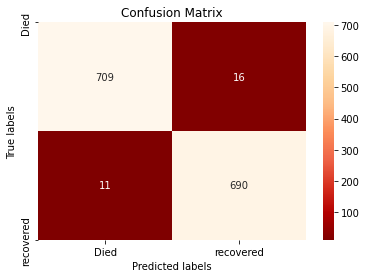

In [ ]:
X_test2=np.resize(X_test1,(1426,35,1))   #validation data  
y_test2=y_test1.to_numpy('int')    #train output
validation_x = X_test2
validation_y = y_test2
ypre=model.predict(validation_x)
pre_y=np.where(ypre>0.5, 1, 0)
accuracy = accuracy_score(validation_y, pre_y)
auc=metrics.roc_auc_score(validation_y, pre_y)
print('Accuracy: %f' % accuracy)
print('AUC: %f' % auc)
print('Classification Report')
target_names = ['Recovered', 'Died']
print(classification_report(validation_y, pre_y, target_names=target_names))
# confusion matrix
matrix = confusion_matrix(validation_y, pre_y)
print(matrix)
ax=plt.subplot()
sns.heatmap(matrix,annot=True,ax=ax,cmap='OrRd_r', fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'recovered']); 
ax.yaxis.set_ticklabels(['Died', 'recovered']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])

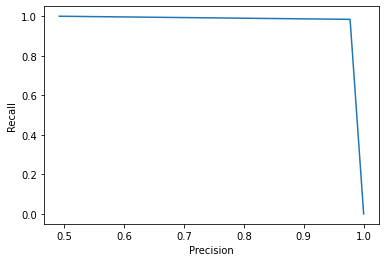

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(validation_y,pre_y)
plt.plot(precision,recall)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.show()